# Figure 1

In [132]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import scipy

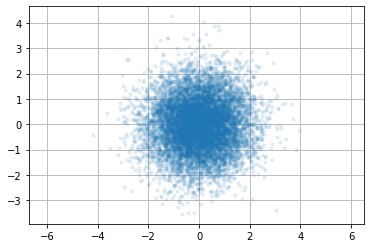

In [80]:
means = np.array([0, 0])
cov = np.array([[1, 0], [0, 1]])
n_vals = int(1e4)
vals = np.random.multivariate_normal(means, cov, size=n_vals)
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
plt.show()

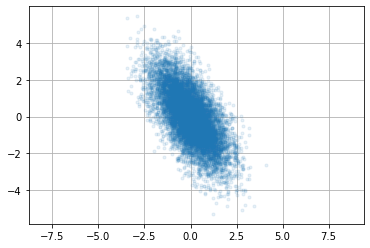

In [82]:
means = np.array([0, 0])
cov = np.array([[1, -0.9], [-0.9, 2]])
n_vals = int(1e4)
vals = np.random.multivariate_normal(means, cov, size=n_vals)
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
plt.show()

In [83]:
pca = PCA()
pca.fit(vals)

PCA()

In [84]:
print(pca.explained_variance_)
print(pca.components_)

[2.57704421 0.46350399]
[[-0.50959615  0.86041372]
 [-0.86041372 -0.50959615]]


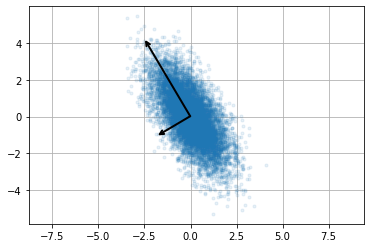

In [85]:
def draw_vector(v0, v1, ax=None, arrowstyle='->',linewidth=2):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle=arrowstyle,
                    linewidth=linewidth,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.show()

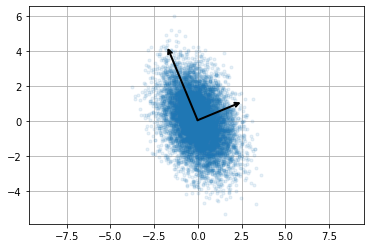

In [86]:
means = np.array([0, 0])
cov = np.array([[1, -0.5], [-0.5, 2]])
n_vals = int(1e4)
vals = np.random.multivariate_normal(means, cov, size=n_vals)
pca = PCA()
pca.fit(vals)
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.show()

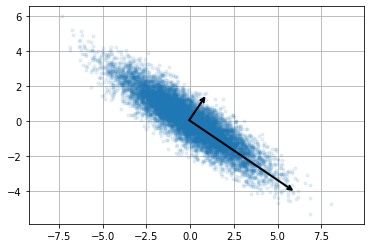

In [87]:
mat = [[1, -1], [0, 1]]
vals_tran = np.array(list(map(lambda x: np.matmul(mat, x), vals)))
pca_tran = PCA()
pca_tran.fit(vals_tran)
plt.plot(vals_tran[:, 0], vals_tran[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(pca_tran.explained_variance_, pca_tran.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca_tran.mean_, pca_tran.mean_ + v)
plt.show()

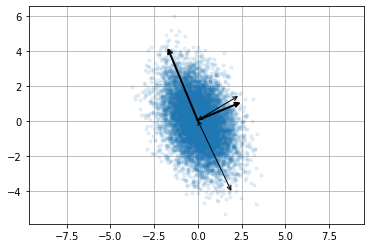

In [88]:
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
for length, vector in zip(pca_tran.explained_variance_, pca_tran.components_):
    v = vector * 3 * np.sqrt(length) 
    draw_vector(pca.mean_, pca.mean_ + np.matmul(np.linalg.inv(mat), v), arrowstyle="<->",linewidth=1)
plt.show()

In [89]:
np.linalg.inv([[1, -1], [0, 1]])

array([[1., 1.],
       [0., 1.]])

In [90]:
np.matmul([[1, 1], [0, 1]], v)

array([2.31181554, 1.37818923])

# Figure 1 (eigenvectors)

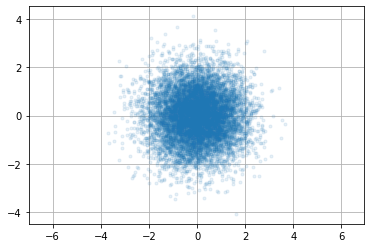

In [91]:
prior_means = np.array([0, 0])
prior_cov = np.array([[1, 0], [0, 1]])
n_vals = int(1e4)
prior_vals = np.random.multivariate_normal(prior_means, prior_cov, size=n_vals)
plt.plot(prior_vals[:, 0], prior_vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
plt.show()

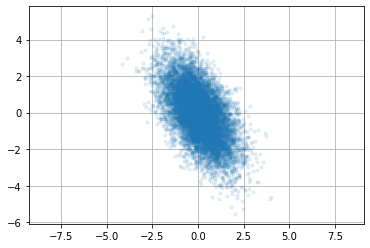

In [92]:
means = np.array([0, 0])
cov = np.array([[1, -0.8], [-0.8, 2]])
n_vals = int(1e4)
vals = np.random.multivariate_normal(means, cov, size=n_vals)
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
plt.show()

In [100]:
pca_m = np.linalg.eig(np.linalg.inv(np.cov(vals.T)))
print(pca_m)

(array([1.82457915, 0.40996573]), array([[ 0.8745706 , -0.48489821],
       [ 0.48489821,  0.8745706 ]]))


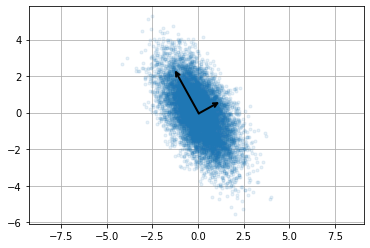

In [120]:
pca_mean = np.nanmean(vals[:, 0]), np.nanmean(vals[:, 1])
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(pca_m[0][::-1], pca_m[1].T):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca_mean, pca_mean + v)
plt.show()

In [51]:
list(zip(pca_m[0], pca_m[1])), pca_mean

([(0.564564434623168, array([-0.70803895, -0.70617339])),
  (5.048099257154913, array([ 0.70617339, -0.70803895]))],
 (-0.0011920826552797052, 0.002962494697751373))

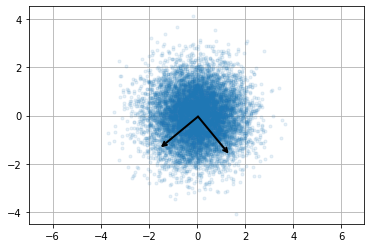

In [116]:
prior_pca_m = np.linalg.eig(np.linalg.inv(np.cov(prior_vals.T)))
prior_pca_mean = np.nanmean(vals[:, 0]), np.nanmean(vals[:, 1])
plt.plot(prior_vals[:, 0], prior_vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(prior_pca_m[0][::-1], prior_pca_m[1].T):
    v = vector * 2 * np.sqrt(length)
    draw_vector(prior_pca_mean, prior_pca_mean + v)
plt.show()

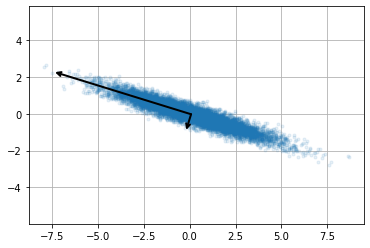

In [129]:
mat = [[1, -1], [0, 0.5]]
vals_tran = np.array(list(map(lambda x: np.matmul(mat, x), vals)))
pca_m_tran = np.linalg.eig(np.linalg.inv(np.cov(vals_tran.T)))
pca_mean_tran = np.nanmean(vals_tran[:, 0]), np.nanmean(vals_tran[:, 1])
plt.plot(vals_tran[:, 0], vals_tran[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(pca_m_tran[0][::-1], pca_m_tran[1].T):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca_mean_tran, pca_mean_tran + v)
plt.show()

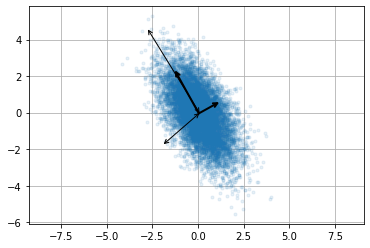

In [131]:
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(pca_m[0][::-1], pca_m[1].T):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca_mean, pca_mean + v)
for length, vector in zip(pca_m_tran[0][::-1], pca_m_tran[1].T):
    v = vector * 2 * np.sqrt(length) 
    draw_vector(pca_mean_tran, pca_mean_tran + np.matmul(np.linalg.inv(mat), v), arrowstyle="<->",linewidth=1)
plt.show()

# Figure 2 

/home/shubh/anaconda3/envs/gw/lib/python3.10/site-packages/matplotlib/text.py:1419: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/home/shubh/anaconda3/envs/gw/lib/python3.10/site-packages/matplotlib/text.py:1421: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))


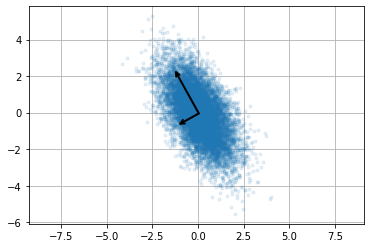

In [134]:
pca_mean = np.nanmean(vals[:, 0]), np.nanmean(vals[:, 1])
cpca = scipy.linalg.eig(np.linalg.inv(np.cov(vals.T)), b=np.linalg.inv(np.cov(prior_vals.T)))
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(cpca[0][::-1], cpca[1].T):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca_mean, pca_mean + v)
plt.show()

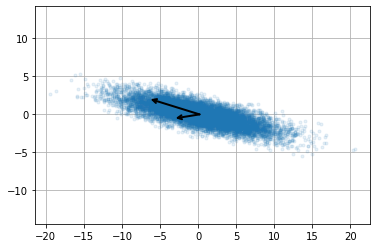

In [145]:
mat = [[4, -1], [0, 1]]
vals_tran = np.array(list(map(lambda x: np.matmul(mat, x), vals)))
prior_tran = np.array(list(map(lambda x: np.matmul(mat, x), prior_vals)))
cpca_tran = scipy.linalg.eig(np.linalg.inv(np.cov(vals_tran.T)), b=np.linalg.inv(np.cov(prior_tran.T)))
pca_mean_tran = np.nanmean(vals_tran[:, 0]), np.nanmean(vals_tran[:, 1])
plt.plot(vals_tran[:, 0], vals_tran[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(cpca_tran[0][::-1], cpca_tran[1].T):
    v = vector * 5 * np.sqrt(length)
    draw_vector(pca_mean_tran, pca_mean_tran + v)
plt.show()

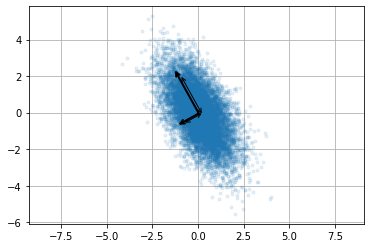

In [147]:
plt.plot(vals[:, 0], vals[:, 1], '.', alpha=0.1)
plt.axis('equal')
plt.grid()
for length, vector in zip(cpca[0][::-1], cpca[1].T):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca_mean, pca_mean + v)
for length, vector in zip(cpca_tran[0][::-1], cpca_tran[1].T):
    v = vector * 5 * np.sqrt(length) 
    draw_vector(pca_mean_tran, pca_mean_tran + np.matmul(np.linalg.inv(mat), v), arrowstyle="<->",linewidth=1)
plt.show()